# Curso de Data Visualizaton - Explorando com Seaborn

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ranksums

## Importação dos dados

In [2]:
dados = pd.read_csv('tips_atualizado.csv')

## Tradução

In [3]:
new_cols = {    
    'total_bill': 'valor',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia',
    'time': 'hora',
    'size': 'total_de_pessoas'
    }

In [4]:
dados = dados.rename(columns=new_cols)
dados.head()

,valor,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
dados.sobremesa = dados.sobremesa.map({'No': 'Não', 'Yes': 'Sim'})
dados.hora = dados.hora.map({'Lunch': 'Almoço', 'Dinner': 'Jantar'})
dados.dia = dados.dia.map({'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'})
dados.head()

,valor,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Conhecendo os dados

In [6]:
dados.shape

(3416, 6)

In [7]:
dados.head()

,valor,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [8]:
dados.describe().round(2)

,valor,gorjeta,total_de_pessoas
count,3416.00,3416.00,3416.00
mean,19.82,2.71,2.57
std,8.98,1.08,0.95
min,2.80,0.77,1.00
25%,13.39,1.92,2.00
50%,17.80,2.55,2.00
75%,24.33,3.29,3.00
max,55.80,10.00,6.00


In [9]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3416 entries, 0 to 3415
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   valor             3416 non-null   float64
 1   gorjeta           3416 non-null   float64
 2   sobremesa         3416 non-null   object 
 3   dia               3416 non-null   object 
 4   hora              3416 non-null   object 
 5   total_de_pessoas  3416 non-null   int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 160.2+ KB


In [10]:
dados.corr()

,valor,gorjeta,total_de_pessoas
valor,1.000000,0.493706,0.594730
gorjeta,0.493706,1.000000,0.386051
total_de_pessoas,0.594730,0.386051,1.000000


## Análise 1 - Valor da conta de gorjeta

In [11]:
dados.columns

Index(['valor', 'gorjeta', 'sobremesa', 'dia', 'hora', 'total_de_pessoas'], dtype='object')

<AxesSubplot:xlabel='valor', ylabel='gorjeta'>

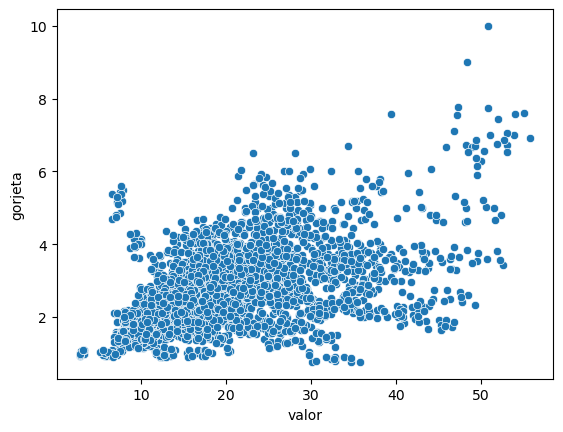

In [12]:
sns.scatterplot(x='valor', y='gorjeta', data=dados)

Existe uma tendência de crescimento da gorjeta com o crescimento do valor da conta.

In [13]:
dados['porcentagem'] = (dados['gorjeta'] / dados['valor']).round(2)
dados['porcentagem']

0       0.06
1       0.16
2       0.17
3       0.14
4       0.15
        ... 
3411    0.18
3412    0.06
3413    0.08
3414    0.09
3415    0.16
Name: porcentagem, Length: 3416, dtype: float64

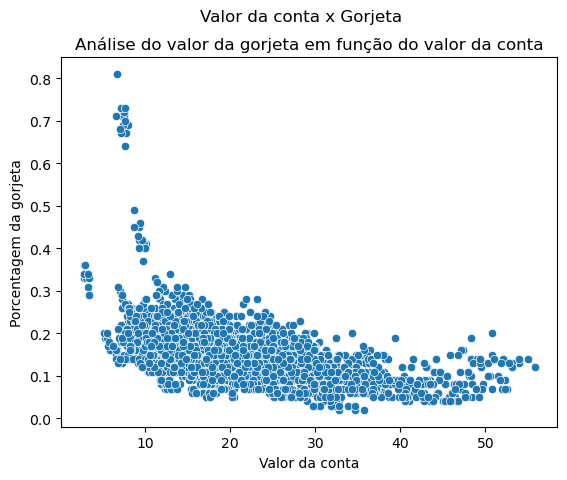

In [14]:
porcentagem_conta = sns.scatterplot(x='valor', y='porcentagem', data=dados)
porcentagem_conta.figure.suptitle('Valor da conta x Gorjeta')
porcentagem_conta.set_title('Análise do valor da gorjeta em função do valor da conta')
porcentagem_conta.set(xlabel='Valor da conta', ylabel='Porcentagem da gorjeta')

imagem = porcentagem_conta.get_figure()
imagem.savefig('porcentagem_conta.png')

Entretando, esse crescimento não é proporcional.

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

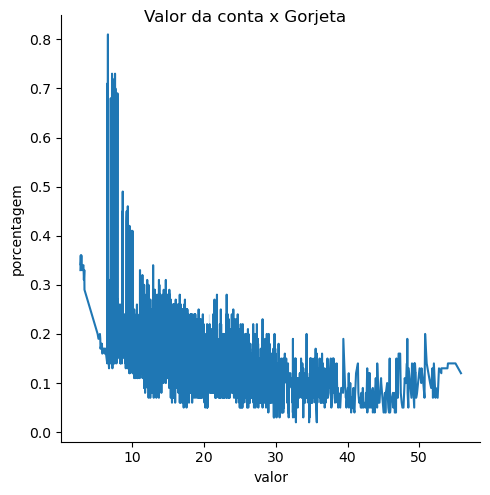

In [15]:
ax = sns.relplot(x='valor', y='porcentagem', data=dados, kind='line')
ax.figure.suptitle('Valor da conta x Gorjeta')

Text(0.5, 0.98, 'Valor da conta x Gorjeta')

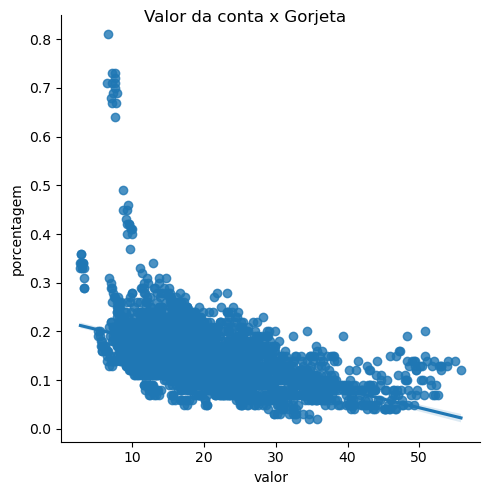

In [16]:
ax = sns.lmplot(x='valor', y='porcentagem', data=dados)
ax.figure.suptitle('Valor da conta x Gorjeta')

Conforme aumenta o valor da conta a porcentagem diminui.

## Análise 2 - Sobremesa

In [17]:
dados[dados.sobremesa == 'Sim'].describe().round(2)

,valor,gorjeta,total_de_pessoas,porcentagem
count,1302.00,1302.00,1302.00,1302.00
mean,20.80,2.71,2.41,0.15
std,9.90,1.16,0.81,0.09
min,2.80,0.77,1.00,0.02
25%,13.50,1.91,2.00,0.09
50%,17.92,2.43,2.00,0.15
75%,26.81,3.33,3.00,0.19
max,55.80,10.00,5.00,0.81


In [18]:
dados[dados.sobremesa == 'Não'].describe().round(2)

,valor,gorjeta,total_de_pessoas,porcentagem
count,2114.00,2114.00,2114.00,2114.00
mean,19.22,2.71,2.67,0.15
std,8.32,1.02,1.01,0.04
min,6.53,0.91,1.00,0.04
25%,13.28,1.93,2.00,0.12
50%,17.74,2.61,2.00,0.15
75%,22.75,3.28,3.00,0.18
max,53.09,9.00,6.00,0.33


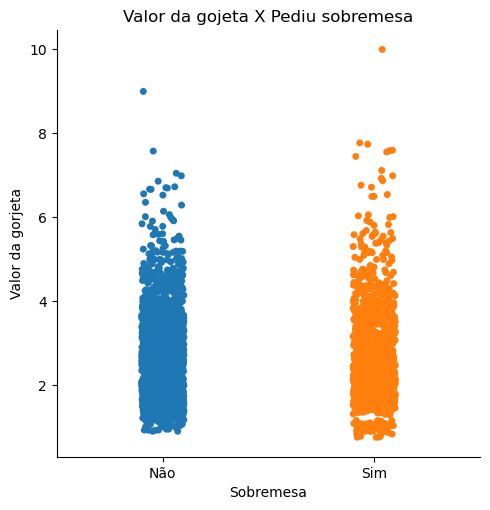

In [19]:
ax = sns.catplot(x='sobremesa', y='gorjeta', data=dados)
ax.set(xlabel='Sobremesa', ylabel='Valor da gorjeta', title='Valor da gojeta X Pediu sobremesa')

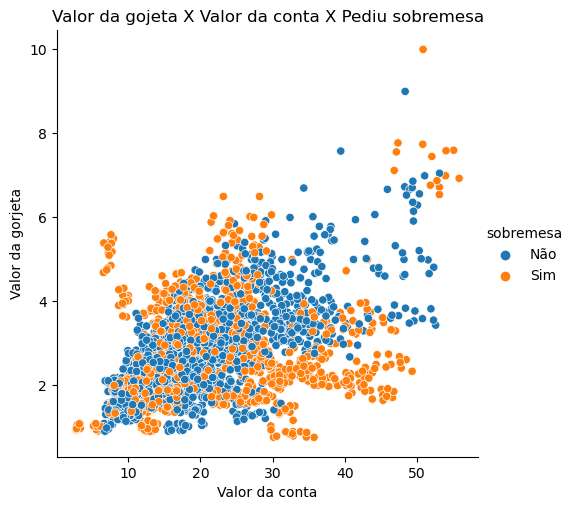

In [20]:
ax = sns.relplot(x='valor', y='gorjeta', hue='sobremesa', data=dados)
ax.set(xlabel='Valor da conta', ylabel='Valor da gorjeta', title='Valor da gojeta X Valor da conta X Pediu sobremesa')


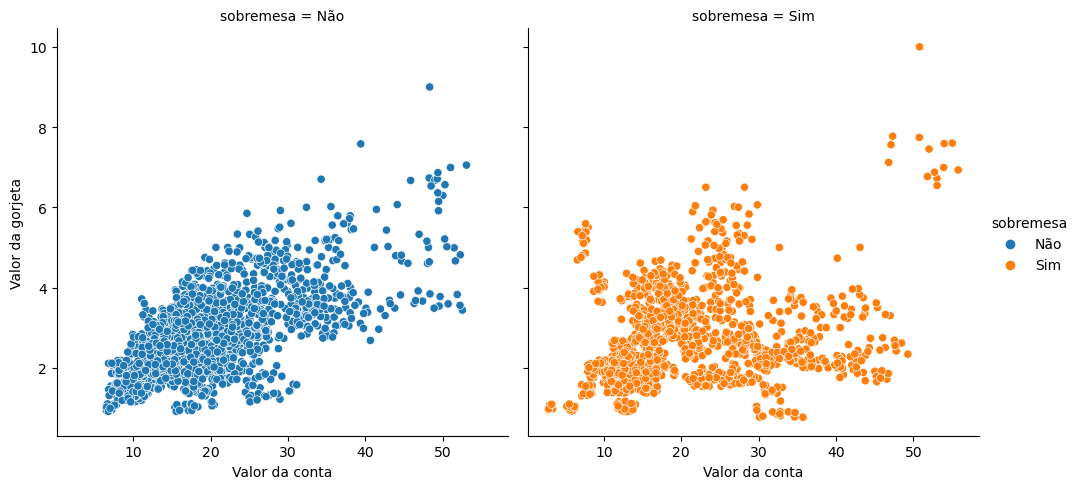

In [21]:
ax = sns.relplot(x='valor', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)
ax.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')


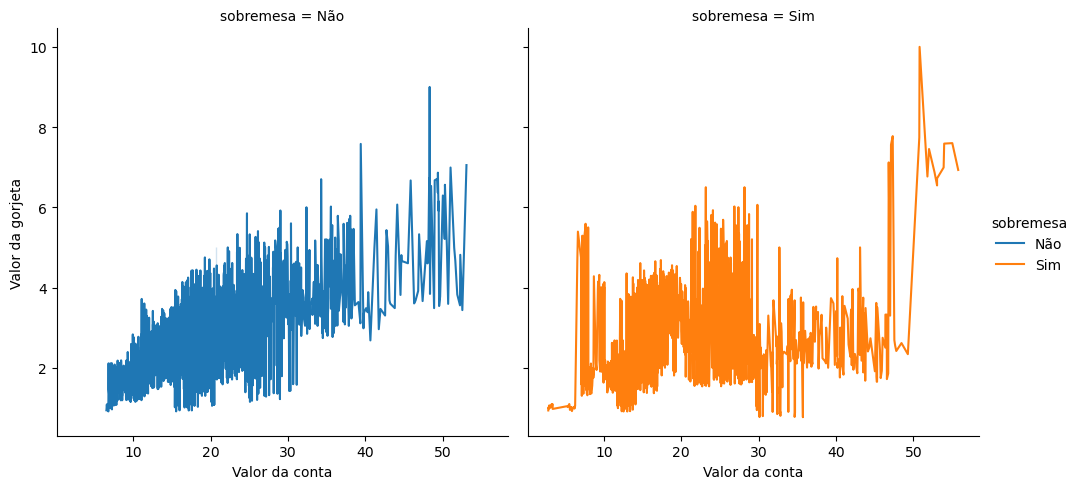

In [22]:
ax = sns.relplot(x='valor', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados, kind='line')
ax.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')


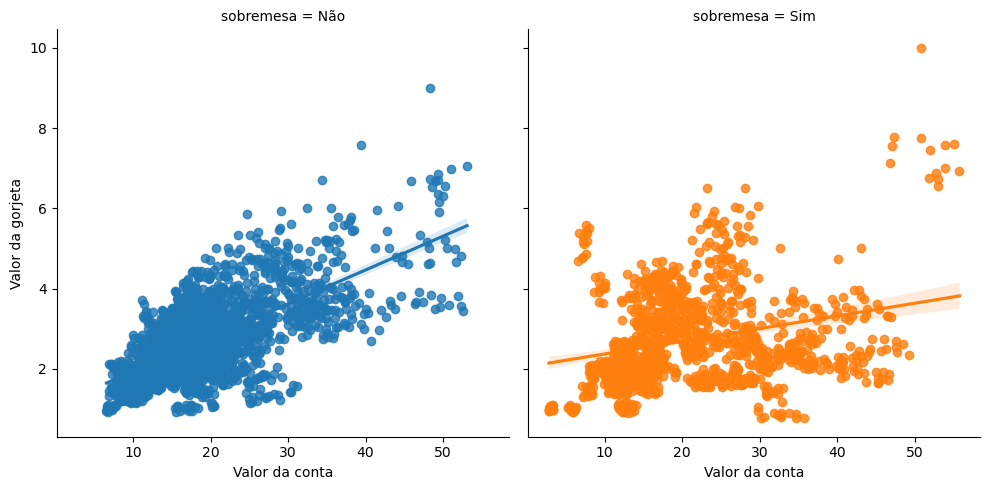

In [23]:
ax = sns.lmplot(x='valor', y='gorjeta', hue='sobremesa', col='sobremesa', data=dados)
ax.set(xlabel='Valor da conta', ylabel='Valor da gorjeta')

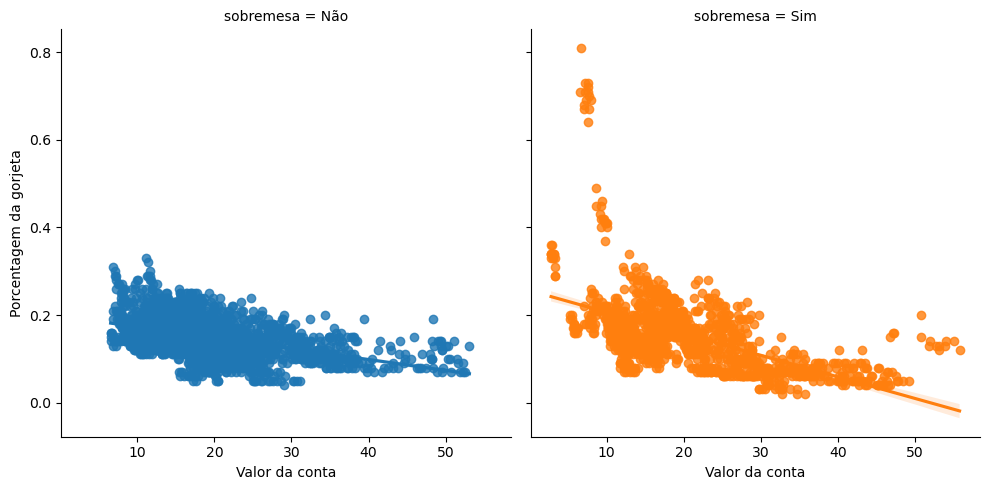

In [24]:
ax = sns.lmplot(x='valor', y='porcentagem', hue='sobremesa', col='sobremesa', data=dados)
ax.set(xlabel='Valor da conta', ylabel='Porcentagem da gorjeta')

Visualmente, existe diferença no valor da gorjeta entre quem pediu e quem não pediu sobremesa.

### Teste de hipótese

**H<sub>0</sub>:** A distribuição da taxa  de gorjeta é igual em ambos os grupos.

**H<sub>1</sub>:** A distribuição da taxa  de gorjeta **não** é igual em ambos os grupos.

In [25]:
sobremesa = dados.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = dados.query("sobremesa == 'Não'").porcentagem

In [26]:
r = ranksums(sobremesa, sem_sobremesa)
print(f"O valor do p-value é: {r.pvalue.round(2)}")

O valor do p-value é: 0.03


Pelo p-valor não é possível rejeitar a hipótese nula.

## Análise 3 - Dia da semana

In [27]:
dados.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

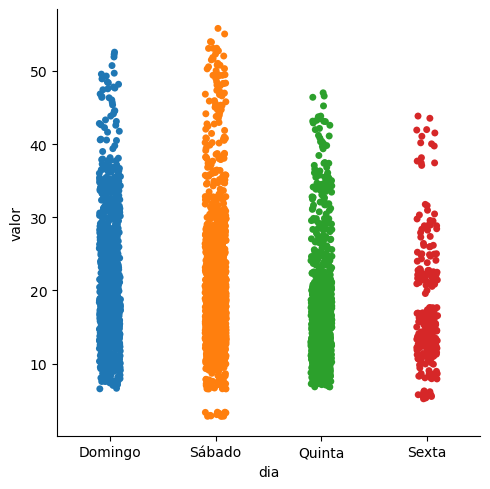

In [30]:
sns.catplot(x='dia', y='valor', data=dados) # Catplot = categorical plot

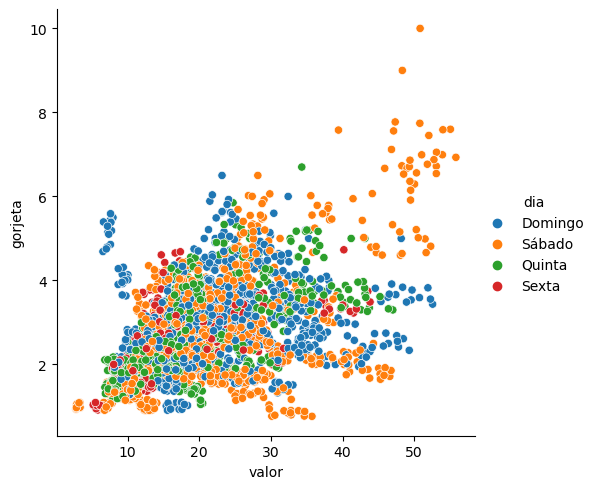

In [31]:
sns.relplot(x='valor', y='gorjeta', hue='dia', data=dados) 

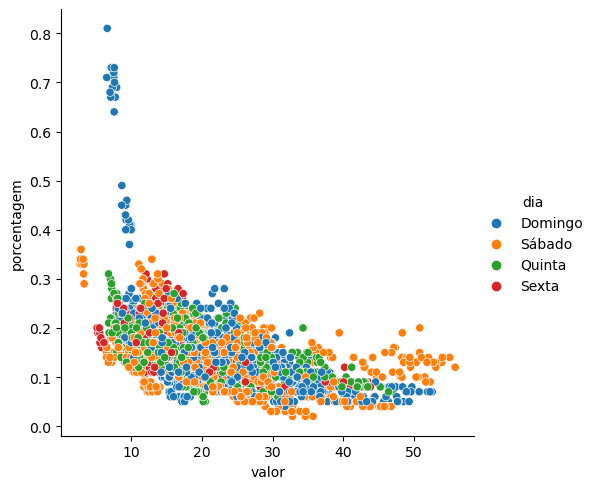

In [32]:
sns.relplot(x='valor', y='porcentagem', hue='dia', data=dados) 

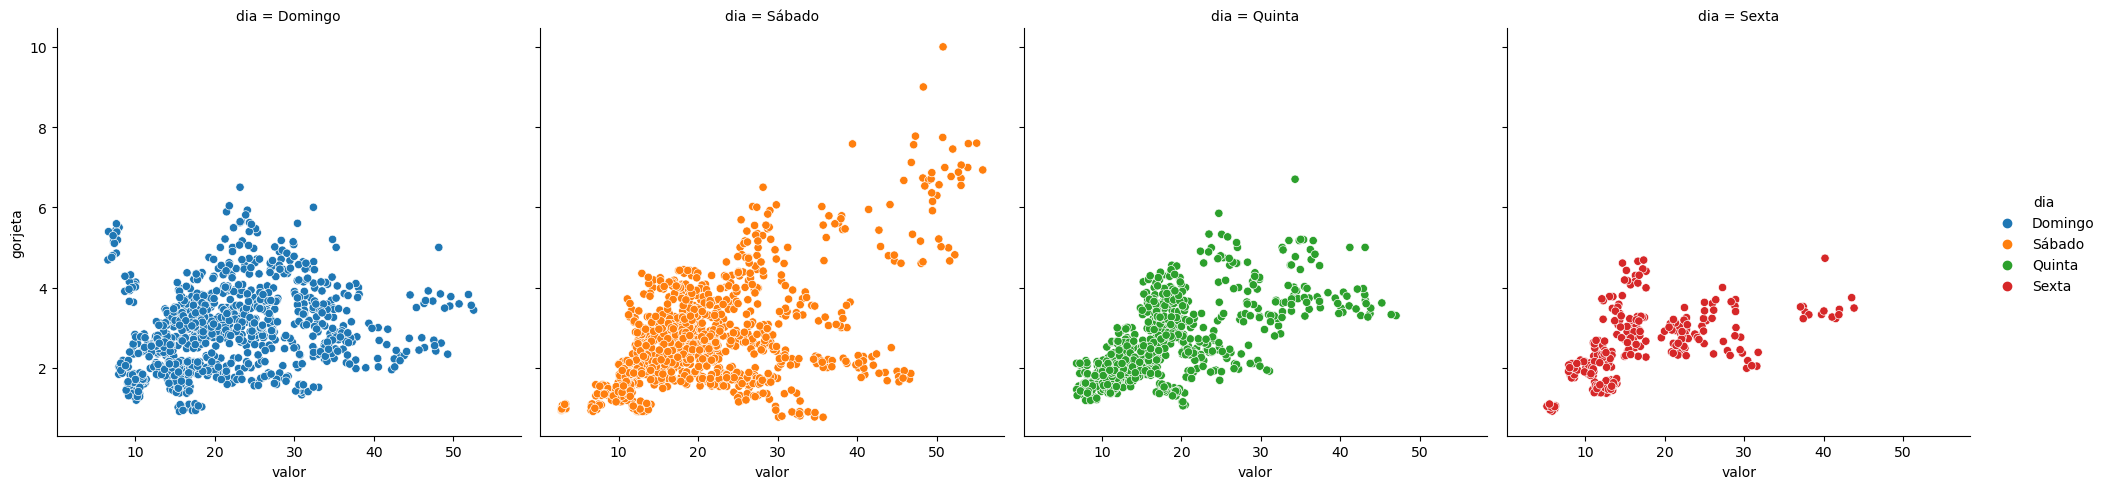

In [33]:
sns.relplot(x='valor', y='gorjeta', hue='dia', col='dia', data=dados) 

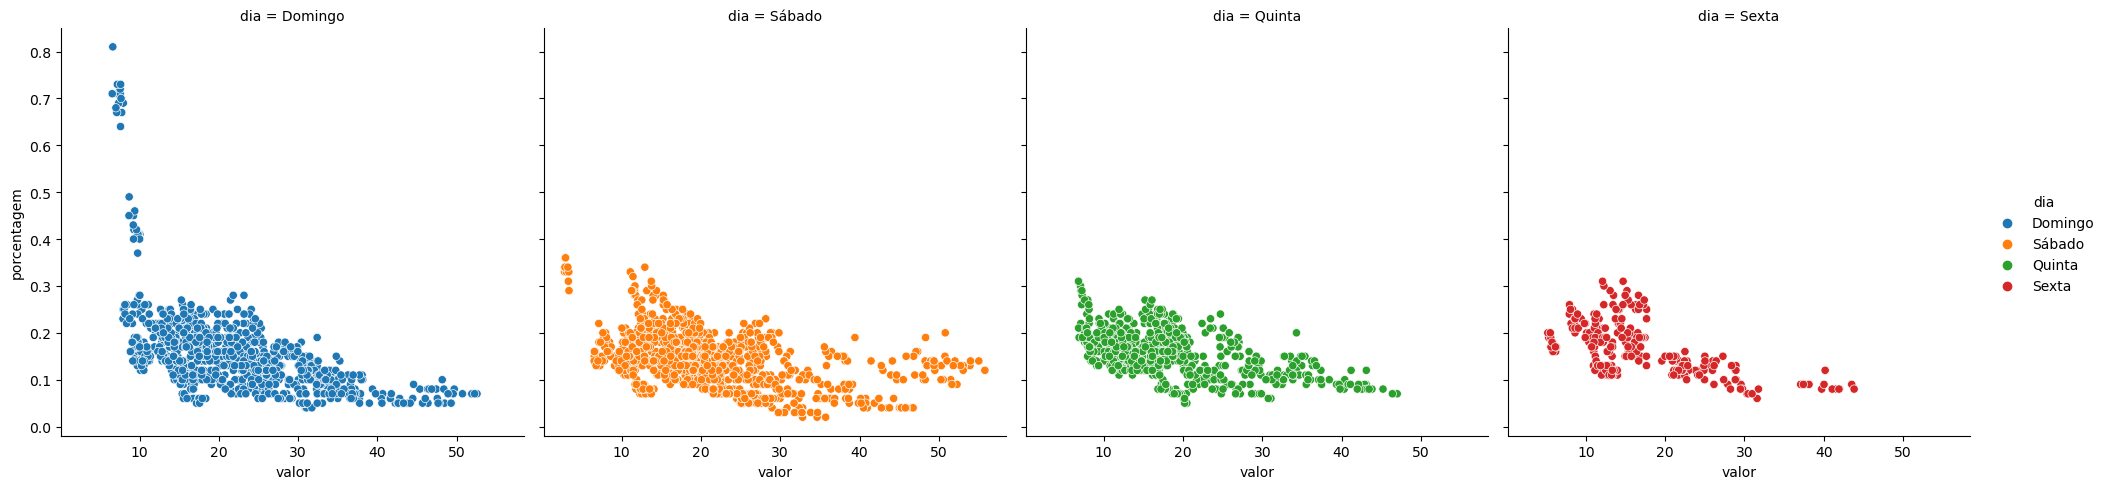

In [34]:
sns.relplot(x='valor', y='porcentagem', hue='dia', col='dia', data=dados) 

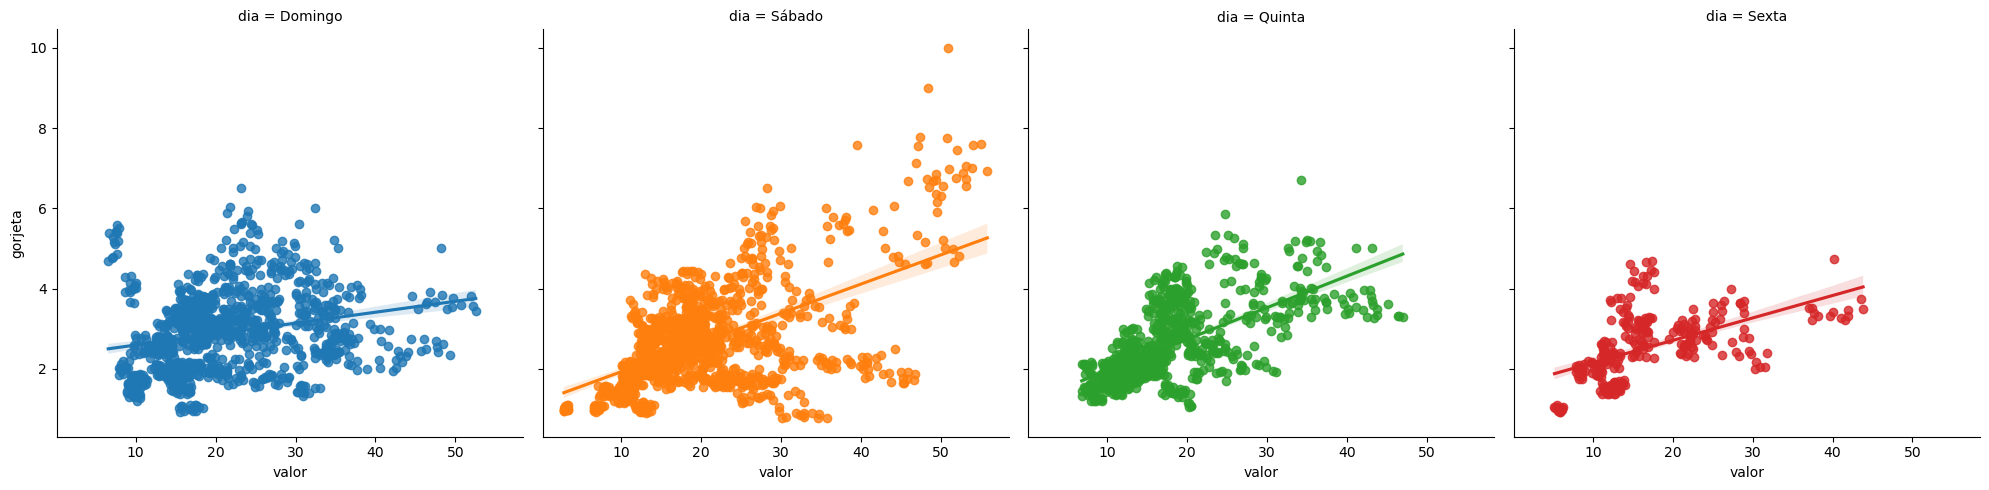

In [35]:
sns.lmplot(x='valor', y='gorjeta', hue='dia', col='dia', data=dados) 

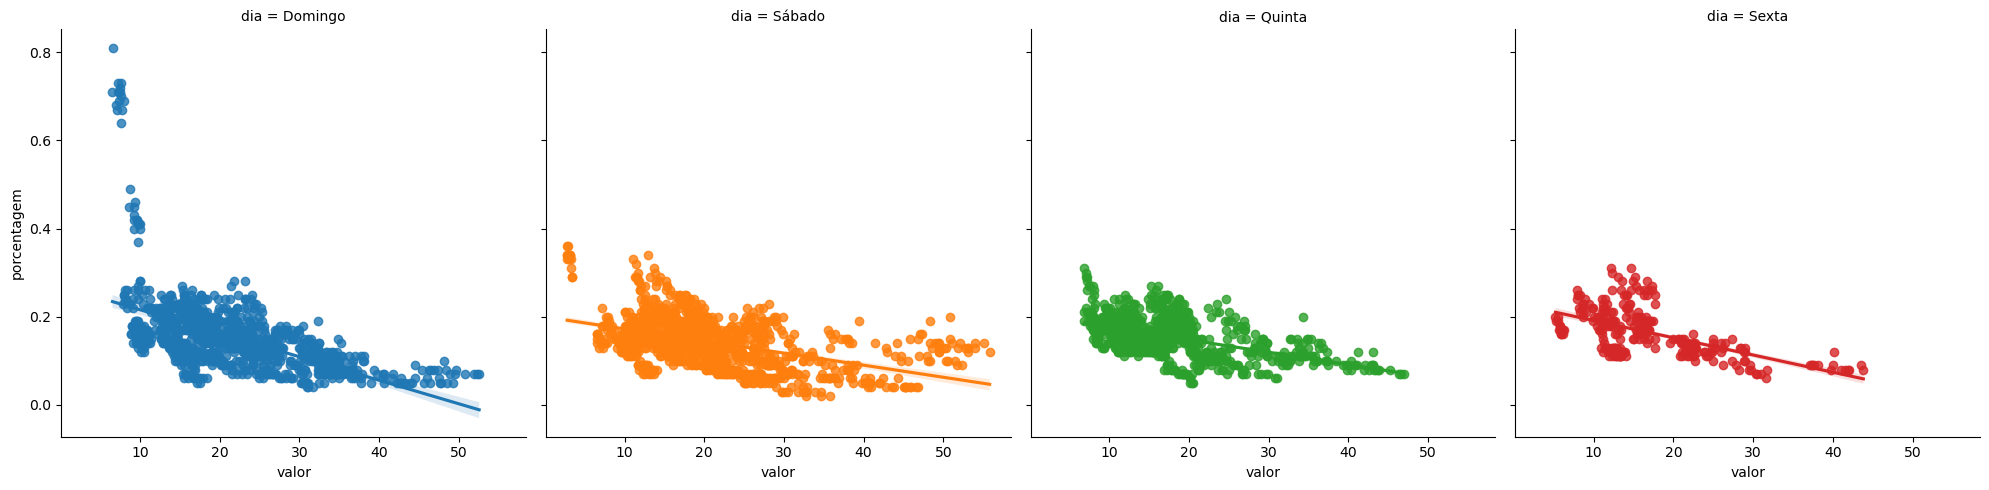

In [36]:
sns.lmplot(x='valor', y='porcentagem', hue='dia', col='dia', data=dados) 

In [37]:
media_gorjetas = round(dados.gorjeta.mean(), 4)
media_gorjetas

2.7112

In [38]:
dados.groupby('dia').mean().round(4)[['valor', 'gorjeta', 'porcentagem']]

,valor,gorjeta,porcentagem
dia,,,
Domingo,21.4391,2.9021,0.1550
Quinta,17.7241,2.5562,0.1541
Sexta,17.2156,2.5500,0.1632
Sábado,20.4802,2.6901,0.1436


In [39]:
print('Frequência dos dias')
dados.dia.value_counts()

Frequência dos dias


Sábado     1218
Domingo    1064
Quinta      868
Sexta       266
Name: dia, dtype: int64

### Teste de hipótese

**H<sub>0</sub>:** A distribuição do valor da conta é igual no sábado e no domingo.

**H<sub>1</sub>:** A distribuição do valor da conta **não** é igual no sábado e no domingo.

In [40]:
valor_domingo = dados.query("dia == 'Domingo'").valor
valor_sabado = dados.query("dia == 'Sábado'").valor

In [41]:
ranksums(valor_domingo, valor_sabado)

RanksumsResult(statistic=3.512690684754087, pvalue=0.0004435935681441821)

Pelo p-valor é possível rejeitar a hipótese nula.

## Análise 4 - Hora do dia

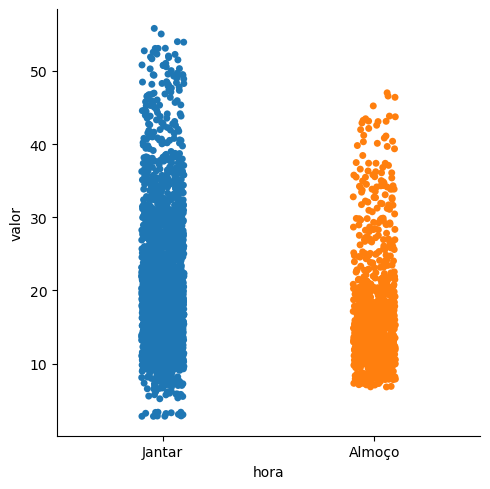

In [42]:
sns.catplot(x='hora', y='valor', data=dados)

c:\Users\lnune\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 60.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\lnune\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


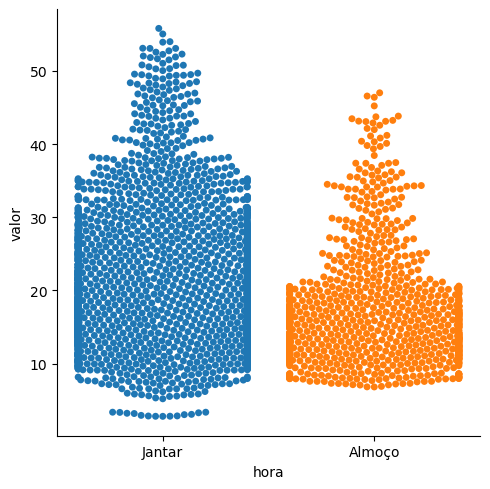

In [43]:
sns.catplot(x='hora', y='valor', kind='swarm', data=dados)

<AxesSubplot:xlabel='hora', ylabel='valor'>

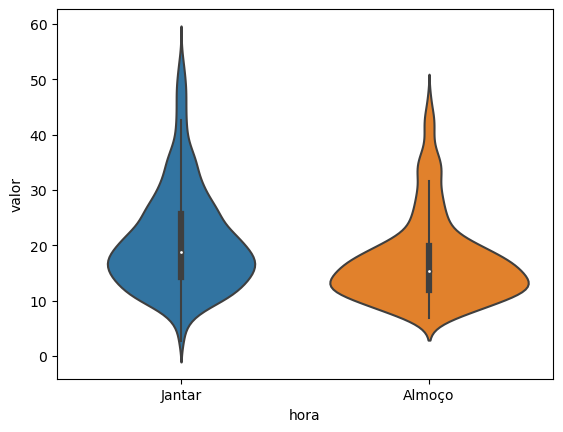

In [44]:
sns.violinplot(x='hora', y='valor', data=dados)

<AxesSubplot:xlabel='hora', ylabel='valor'>

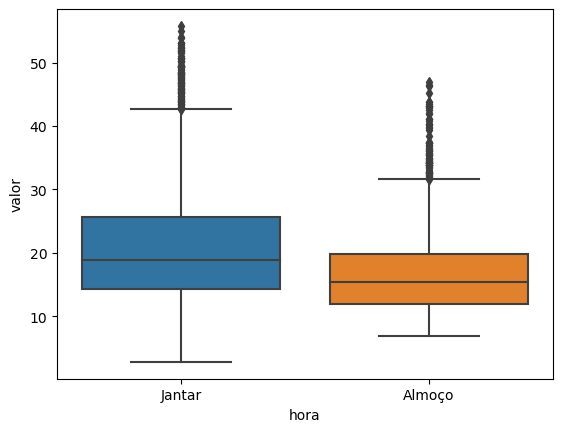

In [45]:
sns.boxplot(x='hora', y='valor', data=dados)

<AxesSubplot:xlabel='hora', ylabel='gorjeta'>

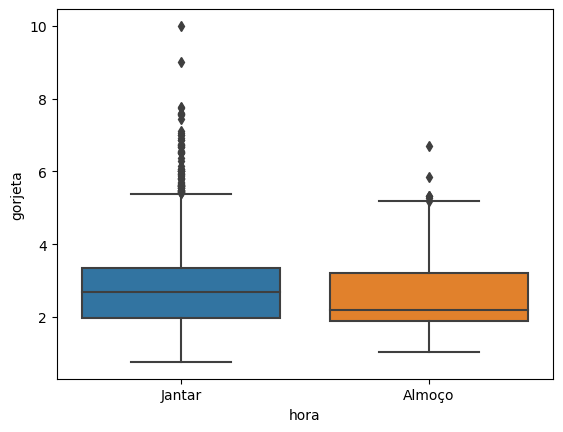

In [46]:
sns.boxplot(x='hora', y='gorjeta', data=dados)

In [47]:
almoco = dados.query("hora =='Almoço'").valor
jantar = dados.query("hora =='Jantar'").valor

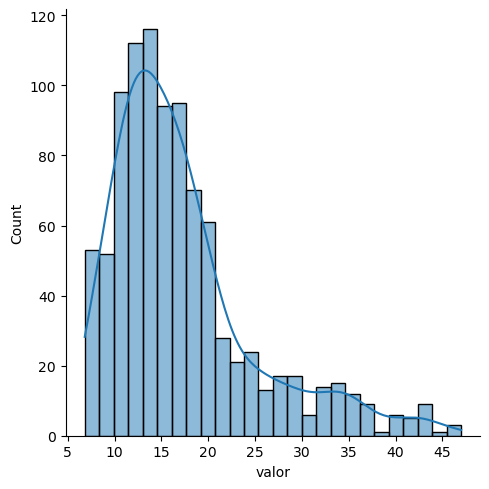

In [48]:
sns.displot(almoco, kde=True)

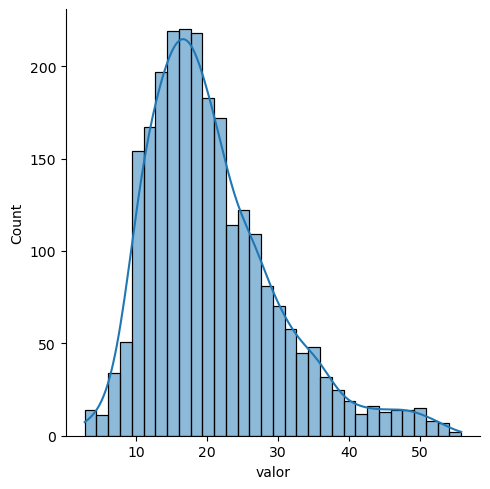

In [49]:
sns.displot(jantar, kde=True)

### 1. Teste de hipótese 

**H<sub>0</sub>:** A distribuição do valor da conta é igual em todos os horários.

**H<sub>1</sub>:** A distribuição do valor da conta **não** é igual em todos os horários.


In [50]:
dados.groupby(['hora']).mean()[['valor', 'gorjeta', 'porcentagem']]

,valor,gorjeta,porcentagem
hora,,,
Almoço,17.213913,2.534495,0.157668
Jantar,20.832954,2.779458,0.148876


In [51]:
dados.groupby(['hora']).std()[['valor', 'gorjeta', 'porcentagem']]

,valor,gorjeta,porcentagem
hora,,,
Almoço,7.767156,0.928157,0.045777
Jantar,9.218549,1.124391,0.070945


In [52]:
ranksums(almoco, jantar)

RanksumsResult(statistic=-12.158511455786174, pvalue=5.169201062207143e-34)

Pelo p-valor podemos rejeitar a hipótese nula. As distribuições são diferentes para cada horário.

### 2. Teste de hipótese

**H<sub>0</sub>:** A distribuição da porcentagem de gorjeta é igual em todos os horários.

**H<sub>1</sub>:** A distribuição da porcentagem de gorjeta **não** é igual em todos os horários.

In [53]:
porcentagem_almoco = dados.query("hora == 'Almoço'").porcentagem
porcentagem_jantar = dados.query("hora == 'Jantar'").porcentagem

ranksums(porcentagem_almoco, porcentagem_jantar)

RanksumsResult(statistic=6.760141268743677, pvalue=1.3785725618355523e-11)

Pelo p-valor é possível rejeitar a hipótese nula.